In [10]:
import os 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import shutil
import random
from pathlib import Path
import torch.nn as nn
import torch.optim as optim
from torchvision.models import mobilenet_v3_large
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import torch

batch_size_train = 64
batch_size_val = 64
batch_size_test = 64
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

train_dataset = datasets.ImageFolder(root = "Dataset/train" , transform = transform)
val_dataset = datasets.ImageFolder(root = "Dataset/val", transform = transform)
test_dataset = datasets.ImageFolder(root= "Dataset/test", transform= transform)

train_loader = DataLoader(train_dataset,batch_size_train,shuffle = True)
val_loader = DataLoader(val_dataset,batch_size_val, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size_test, shuffle=False)

print("ZZZ")

ZZZ


In [11]:
def plot_training_history(train_losses, val_losses, train_accs, val_accs):
    plt.figure(figsize=(12, 5))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.title('Loss Evolution')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Train Accuracy')
    plt.plot(val_accs, label='Val Accuracy')
    plt.title('Accuracy Evolution')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [12]:
def evaluate_model(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Matrice de confusion
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    print(classification_report(all_labels, all_preds))
    
    return np.mean(np.array(all_preds) == np.array(all_labels))

# Entrainement Du model MobileNetV3 sur 20 epoch, 40 epoch et 50 epoch 

In [ ]:
model = mobilenet_v3_large(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

num_features = model.classifier[-1].in_features
dummy_input = torch.randn(1, 3, 128, 128)  
dummy_output = model.features(dummy_input)
num_ftrs = dummy_output.view(-1).shape[0]
                                                
print(f"Dimension réelle des features: {num_ftrs}")  # Doit être 960 pour 128x128

model.classifier[3] = nn.Linear(1280, 14)  
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
print(device)

optimizer = torch.optim.Adam([
    {'params': model.classifier.parameters(), 'lr': 1e-3},  
    {'params': model.features[-10:].parameters(), 'lr': 1e-5}  
], weight_decay=1e-4)

criterion = nn.CrossEntropyLoss()

Dimension réelle des features: 15360
cuda:0


C:\Users\Boumala\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Boumala\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Époque 1/20 — Perte: 1.4397 — Précision: 0.6011
Époque 1/20
Train Loss: 1.4397 | Train Acc: 0.6011
Val Loss: 0.9837 | Val Acc: 0.7268
--------------------------------------------------
Époque 2/20 — Perte: 0.7842 — Précision: 0.7965
Époque 2/20
Train Loss: 0.7842 | Train Acc: 0.7965
Val Loss: 0.6891 | Val Acc: 0.8282
--------------------------------------------------
Époque 3/20 — Perte: 0.6107 — Précision: 0.8414
Époque 3/20
Train Loss: 0.6107 | Train Acc: 0.8414
Val Loss: 0.5662 | Val Acc: 0.8518
--------------------------------------------------
Époque 4/20 — Perte: 0.5185 — Précision: 0.8677
Époque 4/20
Train Loss: 0.5185 | Train Acc: 0.8677
Val Loss: 0.4986 | Val Acc: 0.8704
--------------------------------------------------
Époque 5/20 — Perte: 0.4568 — Précision: 0.8823
Époque 5/20
Train Loss: 0.4568 | Train Acc: 0.8823
Val Loss: 0.4587 | Val Acc: 0.8711
--------------------------------------------------
Époque 6/20 — Perte: 0.4185 — Précision: 0.8885
Époque 6/20
Train Loss: 0.4

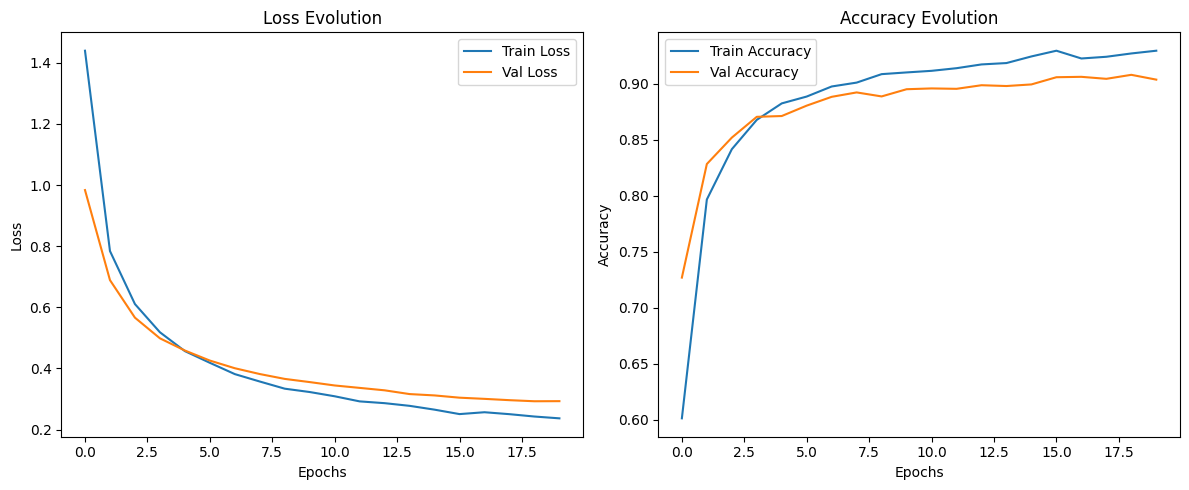

Évaluation sur le jeu de test:


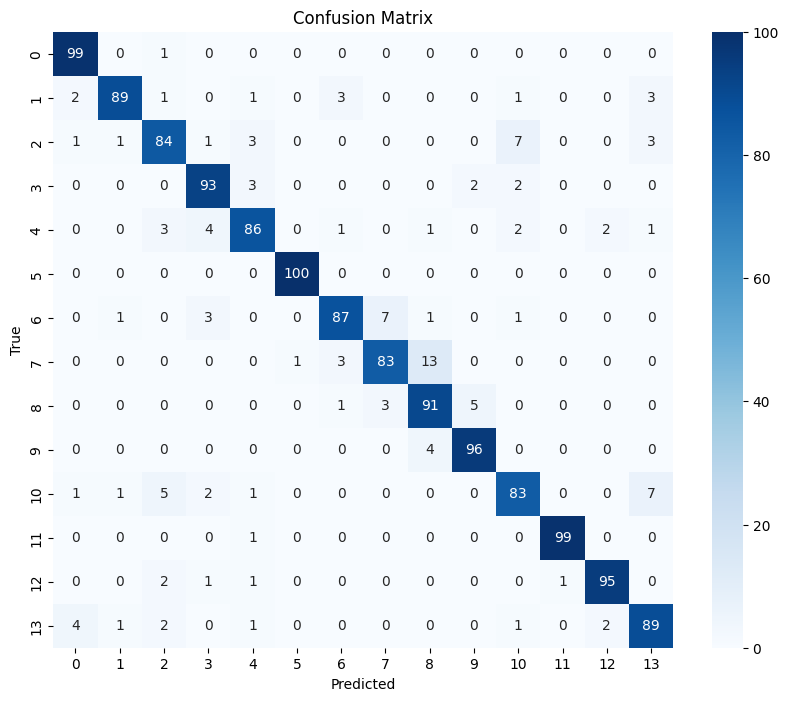

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       100
           1       0.96      0.89      0.92       100
           2       0.86      0.84      0.85       100
           3       0.89      0.93      0.91       100
           4       0.89      0.86      0.87       100
           5       0.99      1.00      1.00       100
           6       0.92      0.87      0.89       100
           7       0.89      0.83      0.86       100
           8       0.83      0.91      0.87       100
           9       0.93      0.96      0.95       100
          10       0.86      0.83      0.84       100
          11       0.99      0.99      0.99       100
          12       0.96      0.95      0.95       100
          13       0.86      0.89      0.88       100

    accuracy                           0.91      1400
   macro avg       0.91      0.91      0.91      1400
weighted avg       0.91      0.91      0.91      1400



In [ ]:
train_losses = []
train_accs = []
val_losses = []
val_accs = []
num_epochs = 20


best_val_acc = 0.0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    

    for inputs,labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs,1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / total 
    epoch_acc = correct / total 
    print(f"Époque {epoch+1}/{num_epochs} — Perte: {epoch_loss:.4f} — Précision: {epoch_acc:.4f}")
    
    epoch_loss = running_loss / total
    epoch_acc = correct / total
    train_losses.append(epoch_loss)
    train_accs.append(epoch_acc)
    
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:  
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            val_running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)
    
    val_epoch_loss = val_running_loss / val_total
    val_epoch_acc = val_correct / val_total
    val_losses.append(val_epoch_loss)
    val_accs.append(val_epoch_acc)
    
    if val_epoch_acc > best_val_acc:
        best_val_acc = val_epoch_acc
        torch.save(model.state_dict(), 'best_model.pth')
    
    print(f"Époque {epoch+1}/{num_epochs}")
    print(f"Train Loss: {epoch_loss:.4f} | Train Acc: {epoch_acc:.4f}")
    print(f"Val Loss: {val_epoch_loss:.4f} | Val Acc: {val_epoch_acc:.4f}")
    print("-"*50)

plot_training_history(train_losses, val_losses, train_accs, val_accs)

print("Évaluation sur le jeu de test:")
test_acc = evaluate_model(model, test_loader, device)


Époque 1/40 — Perte: 0.2261 — Précision: 0.9329
Époque 1/40
Train Loss: 0.2261 | Train Acc: 0.9329
Val Loss: 0.2781 | Val Acc: 0.9139
--------------------------------------------------
Époque 2/40 — Perte: 0.2246 — Précision: 0.9298
Époque 2/40
Train Loss: 0.2246 | Train Acc: 0.9298
Val Loss: 0.2779 | Val Acc: 0.9114
--------------------------------------------------
Époque 3/40 — Perte: 0.2221 — Précision: 0.9312
Époque 3/40
Train Loss: 0.2221 | Train Acc: 0.9312
Val Loss: 0.2768 | Val Acc: 0.9118
--------------------------------------------------
Époque 4/40 — Perte: 0.2148 — Précision: 0.9339
Époque 4/40
Train Loss: 0.2148 | Train Acc: 0.9339
Val Loss: 0.2711 | Val Acc: 0.9146
--------------------------------------------------
Époque 5/40 — Perte: 0.2135 — Précision: 0.9314
Époque 5/40
Train Loss: 0.2135 | Train Acc: 0.9314
Val Loss: 0.2745 | Val Acc: 0.9079
--------------------------------------------------
Époque 6/40 — Perte: 0.2147 — Précision: 0.9323
Époque 6/40
Train Loss: 0.2

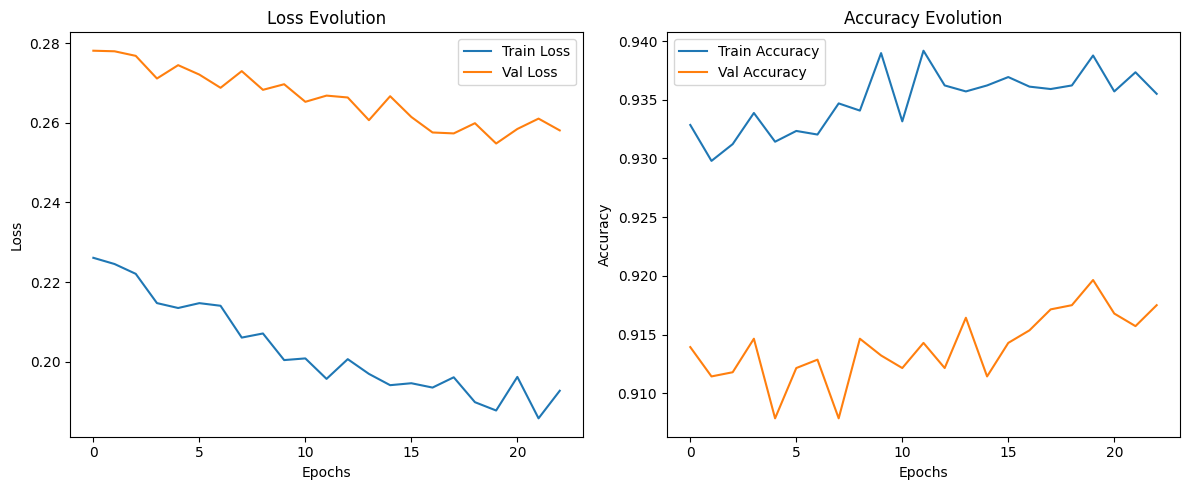

Évaluation sur le jeu de test:


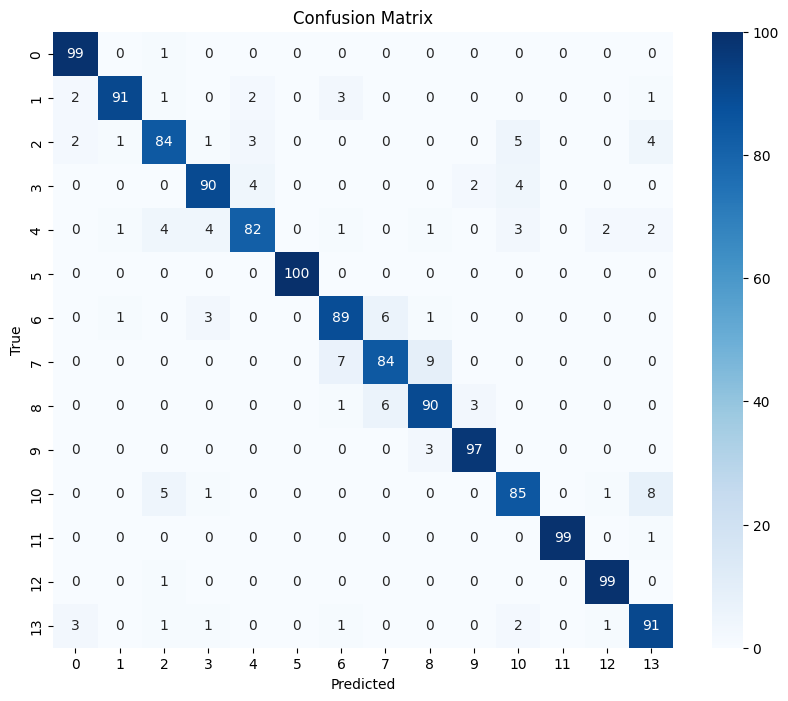

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       100
           1       0.97      0.91      0.94       100
           2       0.87      0.84      0.85       100
           3       0.90      0.90      0.90       100
           4       0.90      0.82      0.86       100
           5       1.00      1.00      1.00       100
           6       0.87      0.89      0.88       100
           7       0.88      0.84      0.86       100
           8       0.87      0.90      0.88       100
           9       0.95      0.97      0.96       100
          10       0.86      0.85      0.85       100
          11       1.00      0.99      0.99       100
          12       0.96      0.99      0.98       100
          13       0.85      0.91      0.88       100

    accuracy                           0.91      1400
   macro avg       0.91      0.91      0.91      1400
weighted avg       0.91      0.91      0.91      1400



In [19]:
train_losses = []
train_accs = []
val_losses = []
val_accs = []
num_epochs = 40
patience = 3
best_val_loss = float('inf')
counter = 0


best_val_acc = 0.0

for epoch in range(num_epochs):
    # Entraînement
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    

    for inputs,labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs,1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / total 
    epoch_acc = correct / total 
    print(f"Époque {epoch+1}/{num_epochs} — Perte: {epoch_loss:.4f} — Précision: {epoch_acc:.4f}")
    
    train_losses.append(epoch_loss)
    train_accs.append(epoch_acc)
    
    # Validation
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:  
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            val_running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)
    
    val_epoch_loss = val_running_loss / val_total
    val_epoch_acc = val_correct / val_total
    val_losses.append(val_epoch_loss)
    val_accs.append(val_epoch_acc)
    if val_epoch_loss < best_val_loss:
        best_val_loss = val_epoch_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping!")
            break
    
    if val_epoch_acc > best_val_acc:
        best_val_acc = val_epoch_acc
        torch.save(model.state_dict(), 'best_model.pth')
    
    print(f"Époque {epoch+1}/{num_epochs}")
    print(f"Train Loss: {epoch_loss:.4f} | Train Acc: {epoch_acc:.4f}")
    print(f"Val Loss: {val_epoch_loss:.4f} | Val Acc: {val_epoch_acc:.4f}")
    print("-"*50)

plot_training_history(train_losses, val_losses, train_accs, val_accs)

# Évaluation finale
print("Évaluation sur le jeu de test:")
test_acc = evaluate_model(model, test_loader, device)


Époque 1/50 — Perte: 1.3829 — Précision: 0.6240
Époque 1/50
Train Loss: 1.3829 | Train Acc: 0.6240
Val Loss: 0.9206 | Val Acc: 0.7464
--------------------------------------------------
Époque 2/50 — Perte: 0.7440 — Précision: 0.8076
Époque 2/50
Train Loss: 0.7440 | Train Acc: 0.8076
Val Loss: 0.6422 | Val Acc: 0.8375
--------------------------------------------------
Époque 3/50 — Perte: 0.5809 — Précision: 0.8476
Époque 3/50
Train Loss: 0.5809 | Train Acc: 0.8476
Val Loss: 0.5263 | Val Acc: 0.8657
--------------------------------------------------
Époque 4/50 — Perte: 0.5000 — Précision: 0.8629
Époque 4/50
Train Loss: 0.5000 | Train Acc: 0.8629
Val Loss: 0.4663 | Val Acc: 0.8775
--------------------------------------------------
Époque 5/50 — Perte: 0.4399 — Précision: 0.8841
Époque 5/50
Train Loss: 0.4399 | Train Acc: 0.8841
Val Loss: 0.4229 | Val Acc: 0.8875
--------------------------------------------------
Époque 6/50 — Perte: 0.4069 — Précision: 0.8897
Époque 6/50
Train Loss: 0.4

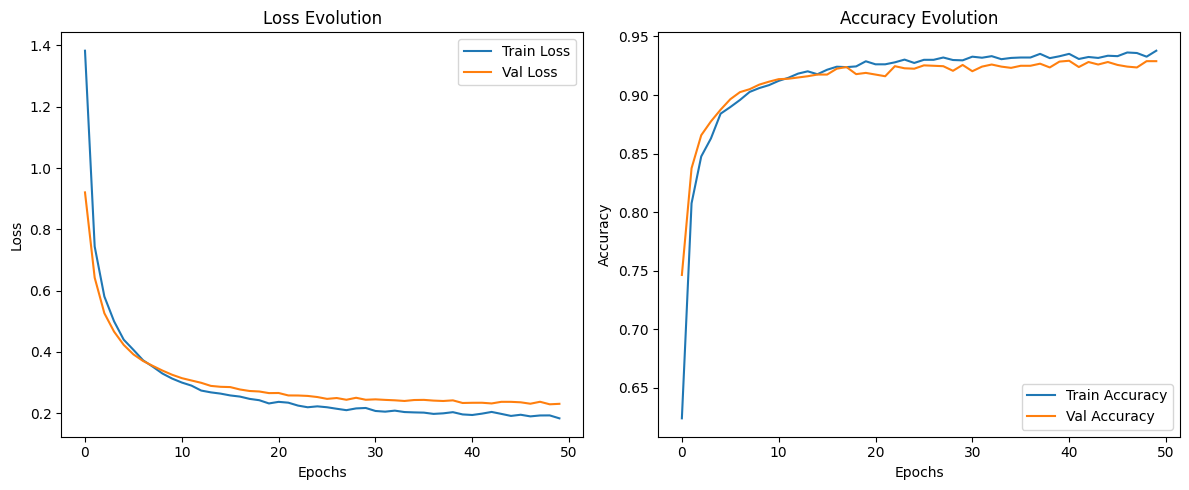

Évaluation sur le jeu de test:


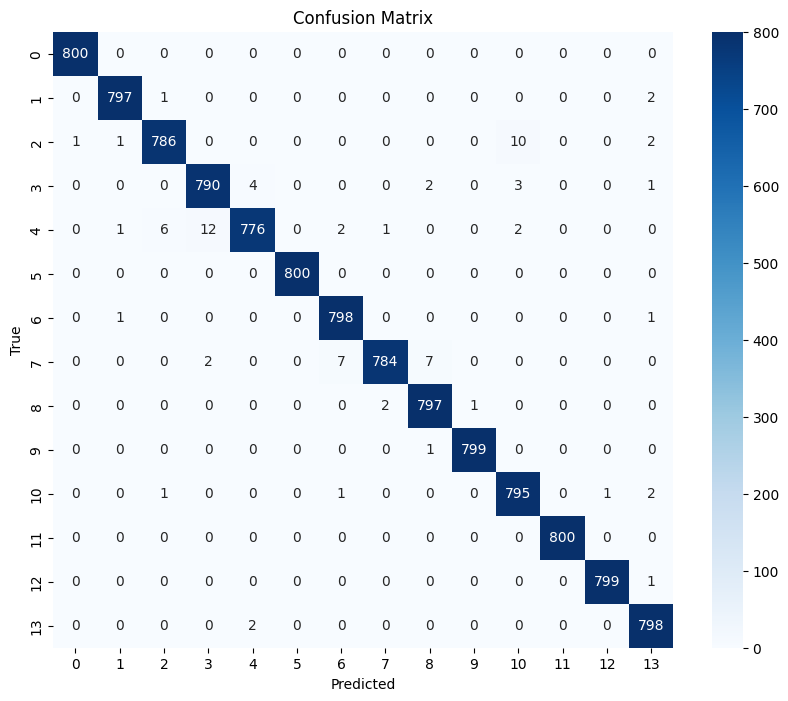

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       800
           1       1.00      1.00      1.00       800
           2       0.99      0.98      0.99       800
           3       0.98      0.99      0.99       800
           4       0.99      0.97      0.98       800
           5       1.00      1.00      1.00       800
           6       0.99      1.00      0.99       800
           7       1.00      0.98      0.99       800
           8       0.99      1.00      0.99       800
           9       1.00      1.00      1.00       800
          10       0.98      0.99      0.99       800
          11       1.00      1.00      1.00       800
          12       1.00      1.00      1.00       800
          13       0.99      1.00      0.99       800

    accuracy                           0.99     11200
   macro avg       0.99      0.99      0.99     11200
weighted avg       0.99      0.99      0.99     11200



In [5]:
train_losses = []
train_accs = []
val_losses = []
val_accs = []
num_epochs = 50


best_val_acc = 0.0

for epoch in range(num_epochs):
    # Entraînement
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    

    for inputs,labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs,1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / total 
    epoch_acc = correct / total 
    print(f"Époque {epoch+1}/{num_epochs} — Perte: {epoch_loss:.4f} — Précision: {epoch_acc:.4f}")
    
    epoch_loss = running_loss / total
    epoch_acc = correct / total
    train_losses.append(epoch_loss)
    train_accs.append(epoch_acc)
    
    # Validation
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:  
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            val_running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)
    
    val_epoch_loss = val_running_loss / val_total
    val_epoch_acc = val_correct / val_total
    val_losses.append(val_epoch_loss)
    val_accs.append(val_epoch_acc)
    
    if val_epoch_acc > best_val_acc:
        best_val_acc = val_epoch_acc
        torch.save(model.state_dict(), 'best_model.pth')
    
    print(f"Époque {epoch+1}/{num_epochs}")
    print(f"Train Loss: {epoch_loss:.4f} | Train Acc: {epoch_acc:.4f}")
    print(f"Val Loss: {val_epoch_loss:.4f} | Val Acc: {val_epoch_acc:.4f}")
    print("-"*50)

plot_training_history(train_losses, val_losses, train_accs, val_accs)

# Évaluation finale
print("Évaluation sur le jeu de test:")
test_acc = evaluate_model(model, train_loader, device)
